#  Homework
You are given a dataset containing information about 1600 red wines (winequality.csv) containing 11 attributes and assignment to one of the three wine quality classess: "poor", "medium" and "good". Perform a preprocessing of this dataset (normalization, standardization). Divide this set into the train and test sets. Choose experimentally the best value of k (using cross-validation) and perform classification using the  k-nn algoritm with the chosen k value. Write a report containing information about the used preprocessing methods, chosen train/test split method (percentage of examples in train/test sets, if shuffling or stratification used), plot of the accuracy depending of k parameter, finally chosen k and obtained classification accuracy on a test set.

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn import model_selection
import matplotlib.pyplot as plt

### 1. Wczytywanie danych

In [5]:
def read_data(path):
    file = pd.read_csv(path)
    df = pd.DataFrame(file)
    status = df.pop("quality")
    return df, status

data_X, data_Y = read_data("assets/winequality-red.csv")

data_X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [6]:
data_Y

0         poor
1         poor
2         poor
3       medium
4         poor
         ...  
1594      poor
1595    medium
1596    medium
1597      poor
1598    medium
Name: quality, Length: 1599, dtype: object

### 2. Standaryzacja danych

In [25]:
def standarize_train_and_test(data_X):
    scaler = preprocessing.StandardScaler()
    return scaler.fit_transform(data_X)

norm_data_X = standarize_train_and_test(data_X)

Preprocessing danych polega na użyciu StandardScaler na danych wejściowych (train_X, test_X)

### 3. Podział danych na zbiór treningowy oraz testowy

In [26]:
def split_data(data_X, data_Y, test_percent = 20, random_state=5):
    X_train, X_test, y_train, y_test = train_test_split(data_X, data_Y, test_size = test_percent / 100, random_state = random_state)
    return X_train, y_train, X_test, y_test
    
(train_X, train_Y, test_X, test_Y) = split_data(norm_data_X, data_Y)
print("rows in train set: ", train_X.shape[0])
print("rows in test set:", test_X.shape[0])

rows in train set:  1279
rows in test set: 320


Do podziału została użyta funkcja train_test_split z proporcją 80/20 (rozmiar zbioru treningowego/rozmiar zbioru testowego)

### 4. Wybór parametru k

[0.7137254901960784, 0.6484375, 0.6171875, 0.6196078431372549, 0.63671875, 0.63671875, 0.64453125, 0.6484375, 0.64453125, 0.6484375, 0.6640625, 0.63671875, 0.6431372549019608, 0.65234375, 0.65234375, 0.640625, 0.63671875, 0.65625, 0.65234375, 0.63671875]


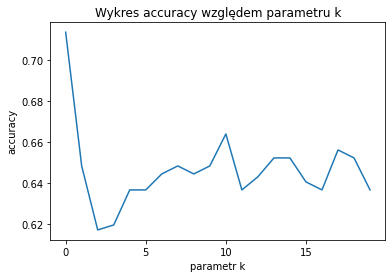

In [28]:
scores = []
for i in range(1,21):
    neigh = KNeighborsClassifier(n_neighbors=i)
    cv_results = model_selection.cross_validate(neigh, train_X, train_Y, cv=5, scoring=["accuracy"])
    scores.append(max(cv_results["test_accuracy"]))
    
print(scores)
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)
plt.plot([i for i in scores])
plt.title("Wykres accuracy względem parametru k")
plt.xlabel("parametr k")
plt.ylabel("accuracy")
plt.show()

Najlepsze accuracy występuje dla parametru $k = 1$

### 5. Klasyfikacja za pomocą algorytmu k-NN

In [30]:
def get_classification_accuracy(train_data_X, train_data_Y, test_data_X, test_data_Y, k = 3):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(train_data_X, train_data_Y)
    predict = neigh.predict(test_data_X)
    return metrics.accuracy_score(test_data_Y, predict)

accuracy = get_classification_accuracy(train_X, train_Y, test_X, test_Y, k = np.argmax(scores) + 1)
print(accuracy)

0.665625
